In [131]:
import os
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [19]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /private/var/folders/5c/5hwthp3s4j78hq0ck0rq31lw0000gp/T/pip-req-build-1byyxarp
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /private/var/folders/5c/5hwthp3s4j78hq0ck0rq31lw0000gp/T/pip-req-build-1byyxarp
  Resolved https://github.com/tensorflow/docs to commit 9287030cdd90c6df4dc1efebc932c57188dea873
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [111]:
tf.random.set_seed(13)
tf.debugging.set_log_device_placement(False)

In [112]:
boston = pd.read_csv('BostonHousing.csv')

In [113]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [114]:
boston.shape

(506, 14)

In [115]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Split the data

In [197]:
boston = boston.sample(frac=1)

In [199]:
train_dataset, some_test_dataset =  train_test_split(boston, test_size=0.3)

print( train_dataset.shape )
print( some_test_dataset.shape )

(354, 14)
(152, 14)


In [200]:
test_dataset, valid_dataset =  train_test_split(some_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(76, 14)
(76, 14)


In [201]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("medv")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
crim,354.0,3.779646,9.519397,0.00632,0.080573,0.234405,3.103700,88.9762
zn,354.0,10.898305,22.073040,0.00000,0.000000,0.000000,17.875000,95.0000
indus,354.0,10.998729,6.860466,1.21000,5.130000,9.690000,18.100000,27.7400
chas,354.0,0.067797,0.251752,0.00000,0.000000,0.000000,0.000000,1.0000
nox,354.0,0.551417,0.110069,0.38500,0.453000,0.538000,0.624000,0.8710
rm,354.0,6.269636,0.707070,3.56100,5.875250,6.183500,6.605500,8.7250
age,354.0,68.570904,28.074243,2.90000,45.625000,75.750000,94.475000,100.0000
dis,354.0,3.769393,2.024661,1.16910,2.113700,3.207450,5.188425,10.7103
rad,354.0,9.316384,8.632662,1.00000,4.000000,5.000000,20.000000,24.0000
tax,354.0,402.655367,169.387113,188.00000,277.000000,329.000000,666.000000,711.0000


In [202]:
train_labels = train_dataset.pop('medv')
test_labels = test_dataset.pop('medv')
valid_labels = valid_dataset.pop('medv')

In [203]:
# make a function to normalize the values of dataset.
def normalize(x):
    return (x - train_stats['mean']) / train_stats['std']
scaled_train_data = normalize(train_dataset)
scaled_test_data = normalize(test_dataset)
scaled_valid_dataset = normalize(valid_dataset)


In [204]:
scaled_train_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
307,-0.391866,1.001298,-1.285442,-0.269299,-0.721526,0.819387,0.061590,-0.289773,-0.268328,-1.066524,0.005014,0.417702,-0.742122
51,-0.392491,0.457649,-0.781103,-0.269299,-1.021339,-0.218699,-0.198435,1.504107,-0.615845,-0.942547,-0.723242,0.383195,-0.476994
185,-0.390695,-0.493738,-1.244628,-0.269299,-0.576161,-0.164956,0.008160,-0.241864,-0.731684,-1.237729,-0.268082,0.302403,0.042099
380,8.949785,-0.493738,1.035100,-0.269299,1.086440,0.987687,0.830979,-1.162117,1.700937,1.554691,0.824303,0.417702,0.608636
378,2.087165,-0.493738,1.035100,-0.269299,1.086440,0.156087,0.984144,-1.177132,1.700937,1.554691,0.824303,0.417702,1.512863


# Build a Neural Network Model 

In [226]:
def build_model():
    model = Sequential([
        Dense(32, input_shape = (scaled_train_data.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        Dense(600,Activation('selu')),
        BatchNormalization(),
        Dense(350, Activation('selu')),
        BatchNormalization(),
#         Dense(200, Activation('selu')),
#         BatchNormalization(),
        Dense(150, Activation('selu')),
        BatchNormalization(),
        Dense(100, Activation('selu')),
        Dense(1) 
        
    ])

    model.compile(loss='mse',optimizer='adam', metrics=['mae', 'mse'])
    return model

model = build_model()
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 32)                448       
                                                                 
 batch_normalization_136 (Ba  (None, 32)               128       
 tchNormalization)                                               
                                                                 
 dense_205 (Dense)           (None, 600)               19800     
                                                                 
 batch_normalization_137 (Ba  (None, 600)              2400      
 tchNormalization)                                               
                                                                 
 dense_206 (Dense)           (None, 350)               210350    
                                                                 
 batch_normalization_138 (Ba  (None, 350)            

In [227]:
example_batch = scaled_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 97ms/step


array([[-1.3021746 ],
       [-1.2432404 ],
       [-0.48376977],
       [ 0.19205536],
       [ 0.9992144 ],
       [-1.6895084 ],
       [-0.810127  ],
       [ 1.0119059 ],
       [-0.312617  ],
       [ 1.4151777 ]], dtype=float32)

# Train the model

In [228]:
history = model.fit(scaled_train_data, train_labels, batch_size = 32, epochs=500,shuffle=True,
        validation_data = (scaled_valid_dataset, valid_labels))

Epoch 1/500
12/12 [==============================] - 1s 17ms/step - loss: 466.5582 - mae: 20.6337 - mse: 466.5582 - val_loss: 290.7468 - val_mae: 15.9620 - val_mse: 290.7468
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 332.4379 - mae: 17.4250 - mse: 332.4379 - val_loss: 144.7634 - val_mae: 10.4138 - val_mse: 144.7634
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 222.5309 - mae: 14.0203 - mse: 222.5309 - val_loss: 86.5562 - val_mae: 7.6990 - val_mse: 86.5562
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 114.5229 - mae: 9.1837 - mse: 114.5229 - val_loss: 59.3543 - val_mae: 6.3133 - val_mse: 59.3543
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 51.4959 - mae: 5.5471 - mse: 51.4959 - val_loss: 151.3294 - val_mae: 9.5882 - val_mse: 151.3294
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 29.4093 - mae: 3.8576 - mse: 29.4093 - val_loss: 66.8008 - val_mae: 6.94

In [229]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
495,7.124887,1.860389,7.124887,10.581184,2.131783,10.581184,495
496,6.231303,1.782925,6.231303,9.406260,2.022717,9.406260,496
497,6.220394,1.869766,6.220394,10.116880,2.151460,10.116880,497
498,7.242093,2.039623,7.242093,11.588741,2.427055,11.588741,498
499,6.344256,1.882895,6.344256,9.413556,2.160075,9.413556,499


# Test the model


In [230]:
example_batch = scaled_test_data[:10]
example_result = model.predict(example_batch)

example_result

1/1 [==============================] - 0s 18ms/step


array([[15.00124 ],
       [21.954817],
       [22.413729],
       [22.78746 ],
       [21.379175],
       [38.247997],
       [26.147314],
       [23.848228],
       [18.486507],
       [21.128653]], dtype=float32)

In [219]:
test_labels[:10]

409    27.5
246    24.3
366    21.9
177    24.6
338    20.6
372    50.0
347    23.1
201    24.1
117    19.2
247    20.5
Name: medv, dtype: float64

# Plotting the loss/mse across epochs


Text(0, 0.5, 'MSE [medv^2]')

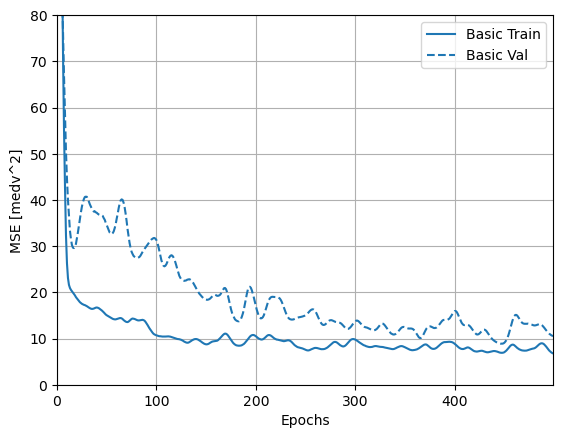

In [231]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 80])
plt.ylabel('MSE [medv^2]')

3/3 [==============================] - 0s 2ms/step


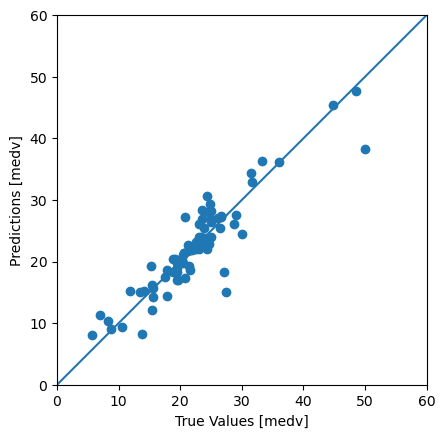

In [232]:
test_predictions = model.predict(scaled_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)